In [81]:
import sys
import os
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

project_path = os.path.abspath(os.path.join('..'))

def aggregate_by_zip_spacial(input_dataframe=pd.read_csv(project_path+ "/examples/sample_data_98075_2018-19.csv")):
    """
    Aggregates a joined input dataframe by date to allow easy graphing of trends
    
    Args:
        input_dataframe: an input dataframe of a format consistent with the output of [join_county_redfin].
        If no input is provided, the default example dataframe is used
    Returns:
        A Pandas dataframe aggregating key columns of interest within the dataframe.

    """
    #convert kc date column to dates
    input_dataframe['Document Date']= input_dataframe['Document Date'].astype('datetime64[ns]')

    #convert to geodataframe for easy merging
    input_dataframe = gpd.GeoDataFrame(input_dataframe, geometry=gpd.points_from_xy(input_dataframe.LONGITUDE, input_dataframe.LATITUDE))
    
    #pull in King County zip shapefiles and pare down to geometry and zip
    df_zip_shape = gpd.read_file("https://opendata.arcgis.com/datasets/06da0f67fc1948e3aae93063750ad02b_790.geojson")
    df_zip_shape = df_zip_shape[['ZIP', 'geometry']]
    
    #aggregate meaningful redfin variables
    input_dataframe = gpd.sjoin(df_zip_shape, input_dataframe).groupby("Zip code").agg({'PRICE':'mean',
                                                                       'DAYS ON MARKET':'mean', 
                                                                        'SQUARE FEET':'mean',
                                                                      '$/SQUARE FEET':'mean'})

    #rename columns to reflect aggregation
    input_dataframe.columns = ['Mean sale price', 'Mean days on market','Mean size (square feet)','Mean cost per sqft']

    #merge aggregated redfin with with zip dataframe
    merged_df = df_zip_shape.merge(input_dataframe, left_on='ZIP', right_on = 'Zip code')
    
    return merged_df

def zipcode_choro(opening_data = aggregate_by_zip_spacial(), mapping_var='Mean sale price'):
    """
    Creates a simple zipcode choropleth map for the variable of interest
    
    Args:
        input_dataframe: aggregated dataframe of a format consistent with the output of aggregate_by_zip_spacial.
        If no input is provided, the default example dataframe from that function is used.
        
        mapping_var: a string identifying the varuable to be mapped; must be a column name within
        input_dataframe.
        
    Returns:
        A saved png of the matplotlib object mapping the variable of interest by zipcode in King County
        
    Raises:
        ValueError: If passed mapping_var is not a column within input_dataframe.
        ValueError: If passed input_dataframe does not have 2 or more zipcodes to map 
    """
    # check that mapping_var is within input_dataframe
    if mapping_var not in opening_data.columns:
        raise ValueError('The mapping variable that you\'ve entered is not valid. ' +
                         'Please select a column from your input dataframe (below)' +
                         'or select a new input dataframe.')

    # check that at least two zipcodes to map within input_dataframe
    if len(np.unique(opening_data['ZIP'])) < 2:
        raise ValueError('The input dataframe has fewer than two zipcodes - please'+
                         ' expand the dataframe to produce a meaningful map.')
    
    #create a basic matplotlib figure    
    f, ax = plt.subplots(1)
    opening_data.plot(column=mapping_var,ax=ax, linewidth=0.5, edgecolor='0.5', legend=True)
    ax.set_axis_off()
    plt.axis('equal')
    plt.title(mapping_var)
    plt.savefig(project_path+'/output/zipcode_choro)output.png')
    
def aggregate_by_date(input_dataframe=pd.read_csv(project_path+ "/examples/sample_data_98075_2018-19.csv")):
    """
    Aggregates a joined input dataframe by date to allow easy graphing of trends
    
    Args:
        input_dataframe: an input dataframe of a format consistent with the output of [func].
        If no input is provided, the default example dataframe is used
    Returns:
        A Pandas dataframe aggregating key columns [ ]
    Raises:
        ValueError: If passed file_name is not a string.
        ValueError: If passed file_name is not valid.
        ValueError: If passed num_rows is not a positive integer.
        OSError: If a connection to the URL is unable to be established.
    """
    #convert county transaction date to datetime format
    input_dataframe['Document Date']= input_dataframe['Document Date'].astype('datetime64[ns]')
    
    #aggregate key variables in dataframe by date
    input_aggregate = input_dataframe.groupby(["Document Date"]).agg({'Sale Price':'mean',
                                                                      'Excise Tax Number':'nunique'})
    #rename columns to reflect aggregation
    input_aggregate.columns = ['Mean sale price', 'Number of transactions']

    #remove any miscodes (some dates in 2070)
    input_aggregate = input_aggregate[input_aggregate.index < datetime.datetime.now()]
    return input_aggregate

def trend_plot(input_dataframe=aggregate_by_date(), trend_variable='Mean sale price'):
    """
    Creates a simple matplotlib line graph of the variable of interest
    
    Args:
        input_dataframe: an input dataframe of a format consistent with the output of aggregate_by_date.
        If no input is provided, the default example dataframe is used.
        
        trend_variable: an input string specifying the variable of interest. If no input is provided
        then mean sale price is graphed.
    Returns:
        A saved png of the matplotlib line graph object

    """
    #create simple 
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10,10)
    ax = plt.axes()
    x = input_dataframe.index
    y=input_dataframe[trend_variable]
    ax.plot(x, y)
    plt.title(trend_variable)
    ax.set_xlim([min(input_dataframe.index), max(input_dataframe.index)])
    plt.savefig(project_path+'/output/trend_plot_output.png');


/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (113,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  warn(
/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (113,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [116]:
"""This is the [temporary?] visualization module which aggregates data
for visualization and produces simple vizualizations.

It has four functions...

"""
import os
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

project_path = os.path.abspath(os.path.join('..'))

def aggregate_by_zip_spacial(input_dataframe=
                             pd.read_csv(project_path+
                                         "/examples/sample_data_98075_2018-19.csv")):
    """
    Aggregates a joined input dataframe by date to allow easy graphing of trends

    Args:
        input_dataframe: an input dataframe of a format consistent with the output of
        [join_county_redfin]. If no input is provided, then the default example
        dataframe is used.
    Returns:
        A Pandas dataframe aggregating key columns of interest within the dataframe.

    """
    #convert kc date column to dates
    input_dataframe['Document Date'] = input_dataframe['Document Date'].astype('datetime64[ns]')

    #convert to geodataframe for easy merging
    input_dataframe = gpd.GeoDataFrame(input_dataframe,
                                       geometry=gpd.points_from_xy(input_dataframe.LONGITUDE,
                                                                   input_dataframe.LATITUDE))

    #pull in King County zip shapefiles and pare down to geometry and zip
    df_zip_shape = gpd.read_file(
        "https://opendata.arcgis.com/datasets/06da0f67fc1948e3aae93063750ad02b_790.geojson")
    df_zip_shape = df_zip_shape[['ZIP', 'geometry']]

    #aggregate meaningful redfin variables
    input_dataframe = gpd.sjoin(df_zip_shape,
                                input_dataframe).groupby("Zip code").agg({'PRICE':'mean',
                                                                          'DAYS ON MARKET':'mean',
                                                                          'SQUARE FEET':'mean',
                                                                          '$/SQUARE FEET':'mean'})

    #rename columns to reflect aggregation
    input_dataframe.columns = ['Mean sale price',
                               'Mean days on market',
                               'Mean size (square feet)',
                               'Mean cost per sqft']

    #merge aggregated redfin with with zip dataframe
    merged_df = df_zip_shape.merge(input_dataframe, left_on='ZIP', right_on='Zip code')

    return merged_df

def zipcode_choro(opening_data=aggregate_by_zip_spacial(), mapping_var='Mean sale price'):
    """
    Creates a simple zipcode choropleth map for the variable of interest

    Args:
        input_dataframe: aggregated dataframe of a format consistent with the output of
        aggregate_by_zip_spacial.If no input is provided, the default example dataframe
        from that function is used.

        mapping_var: a string identifying the varuable to be mapped; must be a column name
        within input_dataframe.

    Returns:
        A saved png of the matplotlib object mapping the variable of interest by zipcode
        in King County

    Raises:
        ValueError: If passed mapping_var is not a column within input_dataframe.
        ValueError: If passed input_dataframe does not have 2 or more zipcodes to map
    """
    # check that mapping_var is within input_dataframe
    if mapping_var not in opening_data.columns:
        raise ValueError('The mapping variable that you\'ve entered is not valid. ' +
                         'Please select a column from your input dataframe (below)' +
                         'or select a new input dataframe.')

    # check that at least two zipcodes to map within input_dataframe
    if len(np.unique(opening_data['ZIP'])) < 2:
        raise ValueError('The input dataframe has fewer than two zipcodes - please'+
                         ' expand the dataframe to produce a meaningful map.')

    #create a basic matplotlib figure
    ch_fig, ch_ax = plt.subplots(1)
    opening_data.plot(column=mapping_var, ax=ch_ax, linewidth=0.5, edgecolor='0.5',
                      legend=True)
    ch_ax.set_axis_off()
    plt.axis('equal')
    plt.title(mapping_var)
    plt.savefig(project_path + '/output/zipcode_choro)output.png')

def aggregate_by_date(input_dataframe=pd.read_csv(project_path +
                                                  "/examples/sample_data_98075_2018-19.csv")):
    """
    Aggregates a joined input dataframe by date to allow easy graphing of trends

    Args:
        input_dataframe: an input dataframe of a format consistent with the output of [func].
        If no input is provided, the default example dataframe is used
    Returns:
        A Pandas dataframe aggregating key columns [ ]
    Raises:
        ValueError: If passed file_name is not a string.
        ValueError: If passed file_name is not valid.
        ValueError: If passed num_rows is not a positive integer.
        OSError: If a connection to the URL is unable to be established.
    """
    #convert county transaction date to datetime format
    input_dataframe['Document Date'] = input_dataframe['Document Date'].astype('datetime64[ns]')

    #aggregate key variables in dataframe by date
    input_aggregate = input_dataframe.groupby(["Document Date"]).agg(
        {'Sale Price':'mean',
         'Excise Tax Number':'nunique'})
    
    #rename columns to reflect aggregation
    input_aggregate.columns = ['Mean sale price', 'Number of transactions']

    #remove any miscodes (some dates in 2070)
    input_aggregate = input_aggregate[input_aggregate.index < datetime.datetime.now()]
    return input_aggregate

def trend_plot(input_dataframe=aggregate_by_date(), trend_variable='Mean sale price'):
    """
    Creates a simple matplotlib line graph of the variable of interest

    Args:
        input_dataframe: an input dataframe of a format consistent with the output of
        aggregate_by_date. If no input is provided, then the default example
        dataframe is used.

        trend_variable: an input string specifying the variable of interest. If no input is
        provided then mean sale price is graphed.
    Returns:
        A saved png of the matplotlib line graph object

    """
    #create simple figure
    #fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)
    tr_ax = plt.axes()
    tr_x = input_dataframe.index
    tr_y = input_dataframe[trend_variable]
    tr_ax.plot(tr_x, tr_y)
    plt.title(trend_variable)
    tr_ax.set_xlim([min(input_dataframe.index), max(input_dataframe.index)])
    plt.savefig(project_path+'/output/trend_plot_output.png')

/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (113,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  warn(
/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (113,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


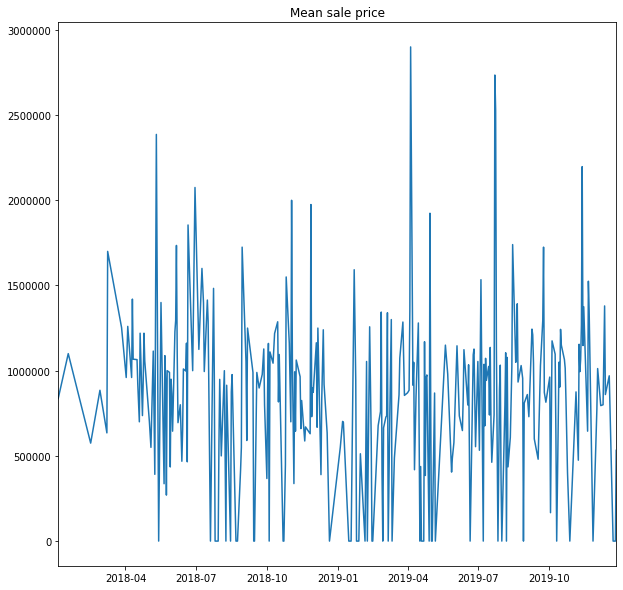

In [117]:
trend_plot()

# Intractive visualization examples

## Context

## Issues / to-do

The purpose of this workbook is to provide a simple-to-use notebook with which to explore the data. To this end, example interactive functions are provided, based on example data. Different approaches are deliberately explored with each figure to assist the user in building their own analysis. This is exploratory code outside of the unit-test environment, and and so should be considered alpha only.

## Import packages and set environmental variables

In [112]:
#import extra packages
from ipywidgets import *

#import custom packages and dependencies
###IMPORT PACKAGE

%matplotlib inline


## Interactive examples

In [97]:
#load a spatial dataframe using custom function
example_spatial_dataframe =  aggregate_by_zip_spacial()

/home/richard/miniconda3/envs/env515a/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  warn(


In [98]:
#set up interactive choropleth plot - select var of interest
def choro_interactive(mapping_var='Mean sale price'):
    f, ax = plt.subplots(1)
    example_spatial_dataframe.plot(column=mapping_var, ax=ax, linewidth=0.5, edgecolor='0.5', legend=True)
    ax.set_axis_off()
    plt.axis('equal')
    
interactive_plot = interactive(choro_interactive,
                               mapping_var=example_spatial_dataframe.select_dtypes(include=np.number).columns.tolist())


In [99]:
#run interactive choropleth plot - select var of interest
interactive_plot

interactive(children=(Dropdown(description='mapping_var', index=1, options=('ZIP', 'Mean sale price', 'Mean da…

In [101]:
#load a data-aggregated dataframe using custom function
example_trend_dataframe =  aggregate_by_date()

In [109]:
# set up interactive trend plot - select var of interest
def g(y):
    plt.plot(example_trend_dataframe.index, example_trend_dataframe[y])
    plt.show()

interactive_plot = interactive(g, y=example_trend_dataframe.columns)

interactive(children=(Dropdown(description='y', options=('Mean sale price', 'Number of transactions'), value='…

In [ ]:
# run interactive trend plot - select var of interest
interactive_plot

In [106]:
# set up interactive trend plot - select date range
def trend_interactive(trend_var='Mean sale price'):

    #interactive trend plot - x range
    fig = plt.figure()
    ax = plt.axes()
    x = example_trend_dataframe.index
    y = example_trend_dataframe[trend_var]
    ax.plot(x, y)

    plt.title(trend_var)

    def update(years = 2):
        ax.set_xlim([datetime.date(2020-years, 1, 1),max(example_trend_dataframe.index)])
        fig.canvas.draw_idle()
        #plt.show()

    interact(update);

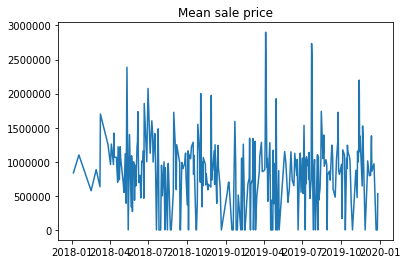

interactive(children=(IntSlider(value=2, description='years', max=6, min=-2), Output()), _dom_classes=('widget…

In [113]:
# run interactive trend plot - select date range
trend_interactive()